In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [216]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [217]:
df = pd.read_csv('supermarket.csv')

In [218]:
df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200734,20071019,6,8,1,9.50,PRD0901335,CL00058,DEP00016,G00006,...,XX,OT,994108000679877,M,MM,Small Shop,Fresh,STORE00001,LS,E02
1,200805,20080328,6,21,1,1.49,PRD0901120,CL00162,DEP00055,G00016,...,XX,NaN,994110300629787,S,MM,Small Shop,Fresh,STORE00001,LS,E02
2,200716,20070612,3,9,1,0.86,PRD0900963,CL00248,DEP00089,G00030,...,NaN,NaN,994106200026009,S,MM,Small Shop,Grocery,STORE00001,LS,E02
3,200815,20080604,4,10,3,0.90,PRD0901055,CL00248,DEP00089,G00030,...,NaN,NaN,994111300076346,L,MM,Top Up,Grocery,STORE00001,LS,E02
4,200626,20060824,5,16,1,1.77,PRD0901877,CL00169,DEP00056,G00017,...,NaN,NaN,994102000065854,L,LA,Top Up,Fresh,STORE00001,LS,E02


In [219]:
df['SHOP_DATE'] = df['SHOP_DATE'].astype(str)

In [220]:
df['SHOP_DATE'] = df['SHOP_DATE'].astype(str)
df['shop_year'] = df['SHOP_DATE'].str[:4].astype(int)
df['shop_month'] = df['SHOP_DATE'].str[4:6].astype(int)
df['shop_day'] = df['SHOP_DATE'].str[4:6].astype(int)
df['SHOP_DATE'] = df['SHOP_DATE'].astype(int)
df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION,shop_year,shop_month,shop_day
0,200734,20071019,6,8,1,9.50,PRD0901335,CL00058,DEP00016,G00006,...,M,MM,Small Shop,Fresh,STORE00001,LS,E02,2007,10,10
1,200805,20080328,6,21,1,1.49,PRD0901120,CL00162,DEP00055,G00016,...,S,MM,Small Shop,Fresh,STORE00001,LS,E02,2008,3,3
2,200716,20070612,3,9,1,0.86,PRD0900963,CL00248,DEP00089,G00030,...,S,MM,Small Shop,Grocery,STORE00001,LS,E02,2007,6,6
3,200815,20080604,4,10,3,0.90,PRD0901055,CL00248,DEP00089,G00030,...,L,MM,Top Up,Grocery,STORE00001,LS,E02,2008,6,6
4,200626,20060824,5,16,1,1.77,PRD0901877,CL00169,DEP00056,G00017,...,L,LA,Top Up,Fresh,STORE00001,LS,E02,2006,8,8


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578082 entries, 0 to 578081
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 578082 non-null  int64  
 1   SHOP_DATE                 578082 non-null  int64  
 2   SHOP_WEEKDAY              578082 non-null  int64  
 3   SHOP_HOUR                 578082 non-null  int64  
 4   QUANTITY                  578082 non-null  int64  
 5   SPEND                     578082 non-null  float64
 6   PROD_CODE                 578082 non-null  object 
 7   PROD_CODE_10              578082 non-null  object 
 8   PROD_CODE_20              578082 non-null  object 
 9   PROD_CODE_30              578082 non-null  object 
 10  PROD_CODE_40              578082 non-null  object 
 11  CUST_CODE                 492494 non-null  object 
 12  CUST_PRICE_SENSITIVITY    492494 non-null  object 
 13  CUST_LIFESTAGE            433142 non-null  o

In [222]:
start_date = 20080101
df_mem = df.dropna(subset=['CUST_CODE'])
df_mem = df_mem.loc[df_mem['SHOP_DATE']>=start_date]

In [223]:
df_mem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112943 entries, 1 to 578075
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 112943 non-null  int64  
 1   SHOP_DATE                 112943 non-null  int64  
 2   SHOP_WEEKDAY              112943 non-null  int64  
 3   SHOP_HOUR                 112943 non-null  int64  
 4   QUANTITY                  112943 non-null  int64  
 5   SPEND                     112943 non-null  float64
 6   PROD_CODE                 112943 non-null  object 
 7   PROD_CODE_10              112943 non-null  object 
 8   PROD_CODE_20              112943 non-null  object 
 9   PROD_CODE_30              112943 non-null  object 
 10  PROD_CODE_40              112943 non-null  object 
 11  CUST_CODE                 112943 non-null  object 
 12  CUST_PRICE_SENSITIVITY    112943 non-null  object 
 13  CUST_LIFESTAGE            99697 non-null   o

In [224]:
df_mem_m = df_mem.groupby('CUST_CODE')[['SPEND']].apply('sum').reset_index()
df_mem_m.columns = (['CUST_CODE', 'total_spend'])
df_mem_m.head()

,CUST_CODE,total_spend
0,CUST0000000689,146.00
1,CUST0000001163,0.52
2,CUST0000001194,722.67
3,CUST0000002605,0.60
4,CUST0000002637,21.25


In [225]:
df_mem_f = df_mem.groupby('CUST_CODE')[['BASKET_ID']].nunique().reset_index()
df_mem_f.columns = (['CUST_CODE', 'basket_count'])
df_mem_f.head()

,CUST_CODE,basket_count
0,CUST0000000689,5
1,CUST0000001163,1
2,CUST0000001194,25
3,CUST0000002605,2
4,CUST0000002637,3


In [226]:
maxdate = df['SHOP_DATE'].max()

df_mem_r = df_mem.groupby('CUST_CODE')[['SHOP_DATE']].max().reset_index()
df_mem_r.columns = (['CUST_CODE', 'recency'])
df_mem_r['recency'] = maxdate-df_mem_r['recency']
df_mem_r.head()

,CUST_CODE,recency
0,CUST0000000689,83
1,CUST0000001163,84
2,CUST0000001194,86
3,CUST0000002605,94
4,CUST0000002637,176


In [227]:
df_rfm = pd.merge(df_mem_r, df_mem_f, on='CUST_CODE')
df_rfm = pd.merge(df_rfm, df_mem_m, on='CUST_CODE')
df_rfm.head()

,CUST_CODE,recency,basket_count,total_spend
0,CUST0000000689,83,5,146.00
1,CUST0000001163,84,1,0.52
2,CUST0000001194,86,25,722.67
3,CUST0000002605,94,2,0.60
4,CUST0000002637,176,3,21.25


In [275]:
X = df_rfm.drop(columns='CUST_CODE')

In [276]:
X = scaler.fit_transform(X)
X

array([[1.37190083e-01, 2.51572327e-02, 6.79896053e-02, 5.00000000e-01],
       [1.38842975e-01, 0.00000000e+00, 2.37514204e-04, 5.00000000e-01],
       [1.42148760e-01, 1.50943396e-01, 3.36552970e-01, 1.00000000e+00],
       ...,
       [5.02479339e-01, 3.14465409e-02, 2.27967065e-02, 0.00000000e+00],
       [1.66942149e-01, 1.88679245e-02, 2.84085617e-02, 5.00000000e-01],
       [4.77685950e-01, 6.28930818e-03, 1.34591382e-03, 0.00000000e+00]])

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` exp

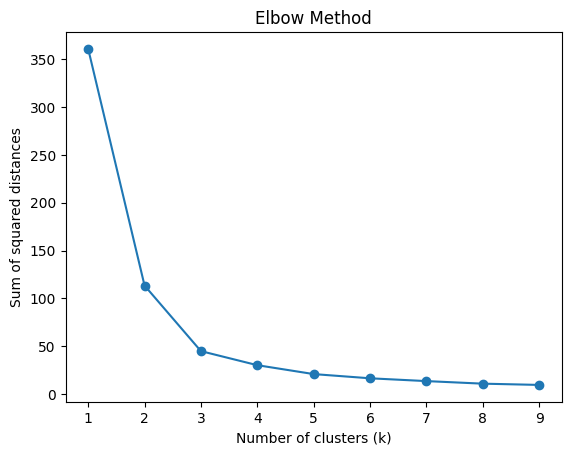

In [277]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate a random dataset
# X, y = make_blobs(n_samples=200, centers=4, random_state=42)

# Perform multiple KMeans clustering with a range of values for k
k_values = range(1, 10)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

In [230]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

array([[1.37190083e-01, 2.51572327e-02, 6.79896053e-02, 0.00000000e+00],
       [1.38842975e-01, 0.00000000e+00, 2.37514204e-04, 0.00000000e+00],
       [1.42148760e-01, 1.50943396e-01, 3.36552970e-01, 1.00000000e+00],
       ...,
       [5.02479339e-01, 3.14465409e-02, 2.27967065e-02, 5.00000000e-01],
       [1.66942149e-01, 1.88679245e-02, 2.84085617e-02, 0.00000000e+00],
       [4.77685950e-01, 6.28930818e-03, 1.34591382e-03, 5.00000000e-01]])

In [256]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Add cluster labels to the DataFrame
df_rfm['Cluster'] = labels
df_rfm.head(3)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


,CUST_CODE,recency,basket_count,total_spend,Cluster
0,CUST0000000689,83,5,146.00,1
1,CUST0000001163,84,1,0.52,1
2,CUST0000001194,86,25,722.67,2


In [257]:
# df_rfm_new = df_rfm[['CUST_CODE', 'Cluster']]
# df_rfm_new.to_csv('cust_code.csv', index=False)

In [273]:
print('cluster0')
print(f"recency = {df_rfm_c0['recency'].median()}")
print(f"basket_count = {df_rfm_c0['basket_count'].median()}")
print(f"total_spend = {df_rfm_c0['total_spend'].median()}")

print('cluster1')
print(f"recency = {df_rfm_c1['recency'].median()}")
print(f"basket_count = {df_rfm_c1['basket_count'].median()}")
print(f"total_spend = {df_rfm_c1['total_spend'].median()}")

print('cluster2')
print(f"recency = {df_rfm_c2['recency'].median()}")
print(f"basket_count = {df_rfm_c2['basket_count'].median()}")
print(f"total_spend = {df_rfm_c2['total_spend'].median()}")

cluster0
recency = 0.32522796352583594
basket_count = 0.0
total_spend = 0.023549870313605274
cluster1
recency = 0.44390243902439025
basket_count = 0.06451612903225806
total_spend = 0.06191632608738573
cluster2
recency = 0.016304347826086956
basket_count = 0.152317880794702
total_spend = 0.2199052864073456


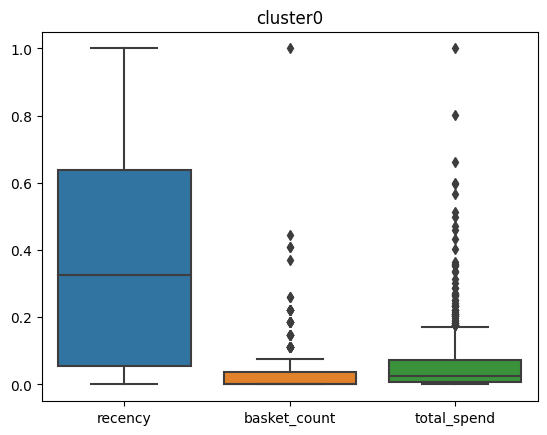

In [272]:
df_rfm_c0 = df_rfm.loc[df_rfm['Cluster']==0]
df_rfm_c0 = df_rfm_c0.drop(columns=['CUST_CODE', 'Cluster'])

scaled_data = scaler.fit_transform(df_rfm_c0)
df_rfm_c0 = pd.DataFrame(scaled_data, columns=df_rfm_c0.columns)

sns.boxplot(df_rfm_c0)
plt.title('cluster0')
plt.show()

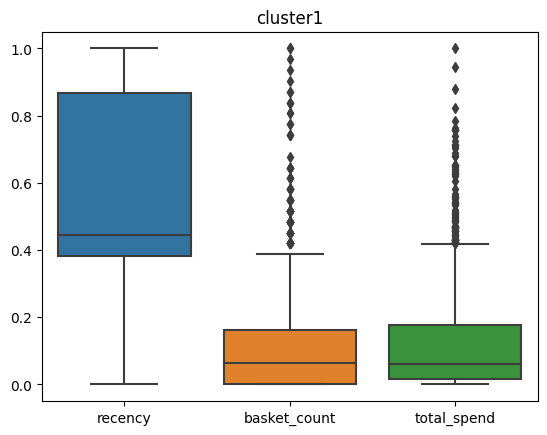

In [260]:
df_rfm_c1 = df_rfm.loc[df_rfm['Cluster']==1]
df_rfm_c1 = df_rfm_c1.drop(columns=['CUST_CODE', 'Cluster'])

scaled_data = scaler.fit_transform(df_rfm_c1)
df_rfm_c1 = pd.DataFrame(scaled_data, columns=df_rfm_c1.columns)

sns.boxplot(df_rfm_c1)
plt.title('cluster1')
plt.show()

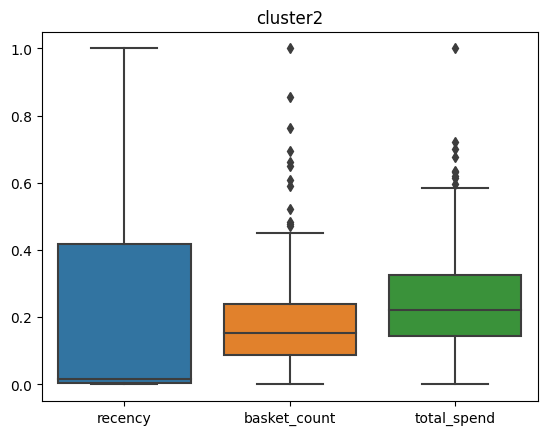

In [261]:
df_rfm_c2 = df_rfm.loc[df_rfm['Cluster']==2]
df_rfm_c2 = df_rfm_c2.drop(columns=['CUST_CODE', 'Cluster'])

scaled_data = scaler.fit_transform(df_rfm_c2)
df_rfm_c2 = pd.DataFrame(scaled_data, columns=df_rfm_c2.columns)

sns.boxplot(df_rfm_c2)
plt.title('cluster2')
plt.show()

In [262]:
# !pip install shap

In [263]:
# explainer = shap.Explainer(model)
# shap_values = explainer(X)
# shap.plots.beeswarm(shap_values)

In [264]:
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

In [265]:
df_mem.head(3)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION,shop_year,shop_month,shop_day
1,200805,20080328,6,21,1,1.49,PRD0901120,CL00162,DEP00055,G00016,...,S,MM,Small Shop,Fresh,STORE00001,LS,E02,2008,3,3
1115,200815,20080605,5,15,1,0.70,PRD0904509,CL00093,DEP00028,G00008,...,L,LA,Top Up,Grocery,STORE00001,LS,E02,2008,6,6
1118,200816,20080609,2,12,1,0.61,PRD0901482,CL00204,DEP00068,G00022,...,M,MM,Small Shop,Grocery,STORE00001,LS,E02,2008,6,6


In [266]:
def pd_rec(cluster):
  c = df_mem[df_mem['CUST_CODE'].isin(df_rfm.loc[df_rfm['Cluster']==cluster]['CUST_CODE'])]
  basket = c.groupby(['BASKET_ID', 'PROD_CODE_10'])['QUANTITY'].sum().unstack().reset_index().fillna(0).set_index('BASKET_ID')
  def encode_units(x):
      if x <= 0:
          return 0
      if x >= 1:
          return 1
  basket_encode = basket.applymap(encode_units)

  basket_filter = basket_encode[(basket_encode > 0).sum(axis=1)>=2]

  frequent_itemsets = apriori(basket_filter, min_support=0.05, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
  frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

  display(association_rules(frequent_itemsets, metric='lift', min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True))

In [267]:
pd_rec(0)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CL00043),(CL00063),0.121508,0.254190,0.053073,0.436782,1.718328,0.022186,1.324193
1,(CL00063),(CL00043),0.254190,0.121508,0.053073,0.208791,1.718328,0.022186,1.110316
2,(CL00063),(CL00140),0.254190,0.149441,0.064246,0.252747,1.691281,0.026259,1.138248
3,(CL00140),(CL00063),0.149441,0.254190,0.064246,0.429907,1.691281,0.026259,1.308224
4,(CL00063),(CL00045),0.254190,0.142458,0.060056,0.236264,1.658479,0.023844,1.122825
5,(CL00045),(CL00063),0.142458,0.254190,0.060056,0.421569,1.658479,0.023844,1.289367
6,(CL00063),(CL00073),0.254190,0.136872,0.057263,0.225275,1.645885,0.022471,1.114109
7,(CL00073),(CL00063),0.136872,0.254190,0.057263,0.418367,1.645885,0.022471,1.282270
8,(CL00070),(CL00063),0.171788,0.254190,0.062849,0.365854,1.439292,0.019182,1.176085
9,(CL00063),(CL00070),0.254190,0.171788,0.062849,0.247253,1.439292,0.019182,1.100253


In [268]:
pd_rec(1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CL00043),(CL00031),0.116086,0.221038,0.051173,0.440816,1.994304,0.025513,1.393035
1,(CL00031),(CL00043),0.221038,0.116086,0.051173,0.231511,1.994304,0.025513,1.150197
2,(CL00031),(CL00140),0.221038,0.135987,0.054726,0.247588,1.820681,0.024668,1.148325
3,(CL00140),(CL00031),0.135987,0.221038,0.054726,0.402439,1.820681,0.024668,1.303570
4,(CL00031),(CL00045),0.221038,0.165127,0.065150,0.294748,1.784981,0.028651,1.183794
5,(CL00045),(CL00031),0.165127,0.221038,0.065150,0.394548,1.784981,0.028651,1.286580
6,(CL00070),(CL00031),0.159915,0.221038,0.058991,0.368889,1.668896,0.023644,1.234271
7,(CL00031),(CL00070),0.221038,0.159915,0.058991,0.266881,1.668896,0.023644,1.145906
8,(CL00063),(CL00070),0.293532,0.159915,0.062544,0.213075,1.332429,0.015604,1.067555
9,(CL00070),(CL00063),0.159915,0.293532,0.062544,0.391111,1.332429,0.015604,1.160257


In [269]:
pd_rec(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CL00023),(CL00031),0.113031,0.268414,0.060198,0.532581,1.984182,0.029859,1.565163
1,(CL00031),(CL00023),0.268414,0.113031,0.060198,0.224274,1.984182,0.029859,1.143405
2,(CL00140),(CL00070),0.148867,0.206091,0.059773,0.401522,1.948280,0.029093,1.326548
3,(CL00070),(CL00140),0.206091,0.148867,0.059773,0.290034,1.948280,0.029093,1.198837
4,(CL00045),(CL00043),0.203541,0.154958,0.056374,0.276966,1.787367,0.024834,1.168745
...,...,...,...,...,...,...,...,...,...
57,(CL00222),(CL00063),0.233853,0.386261,0.100567,0.430042,1.113348,0.010238,1.076816
58,(CL00063),(CL00073),0.386261,0.150992,0.063881,0.165383,1.095315,0.005559,1.017243
59,(CL00073),(CL00063),0.150992,0.386261,0.063881,0.423077,1.095315,0.005559,1.063815
60,(CL00030),(CL00063),0.121105,0.386261,0.050283,0.415205,1.074934,0.003505,1.049494
